<a href="https://colab.research.google.com/github/nagaraj-bidari/Python/blob/main/impassgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Passenger Survival Prediction

##Problem Statement

Titanic Passenger Survival Prediction 2 1. Problem Statement During the Titanic disaster, passenger survival was influenced by factors such as age, gender, and passenger class. The objective of this project is to build a binary classification machine learning model to predict whether a passenger survived (Yes/No) using historical passenger data and to identify the most important factors affecting survival.

#Objectives of the project

* Understand passenger survival patterns  
* Perform basic data preprocessing
* Conduct minimal but meaningful EDA  
* Build binary classification models
* Evaluate model performance
* Identify key survival-influencing features

In [ ]:
from google.colab import files
upload=files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df=pd.read_csv("train.csv")
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
print("dataset shape:",df.shape)


dataset shape: (891, 12)


In [ ]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Handling missing values
num_cols=["Age"]
for col in num_cols:
  df[col]=df[col].fillna(df[col].median())
num_col1=["Embarked"]
for c in num_col1:
  df[c]=df[c].fillna(df[c].mode())
print(df)
if 'Cabin' in df.columns:
  df.drop(columns=['Cabin'],inplace=True)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

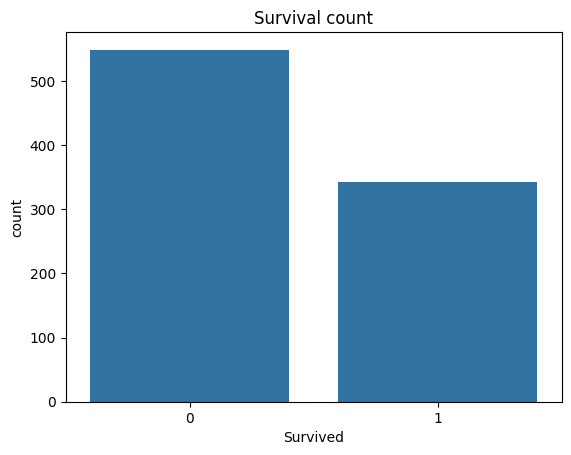

In [ ]:
#Exploratory Data Analysis
#Graph Survival count plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived', data=df)
plt.title("Survival count")
plt.show()


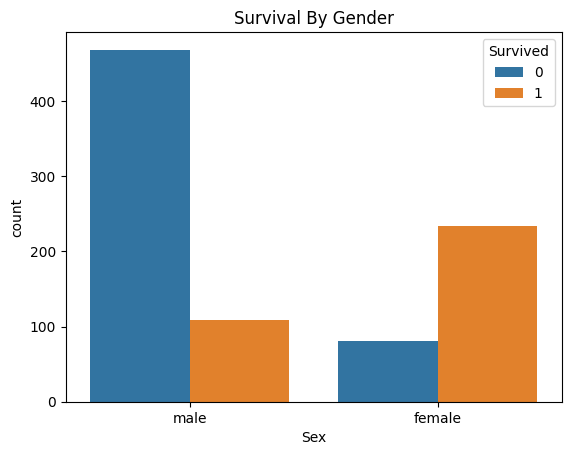

In [ ]:
#Graph Survival by Gender
sns.countplot(x='Sex',hue='Survived', data=df)
plt.title("Survival By Gender")
plt.show()


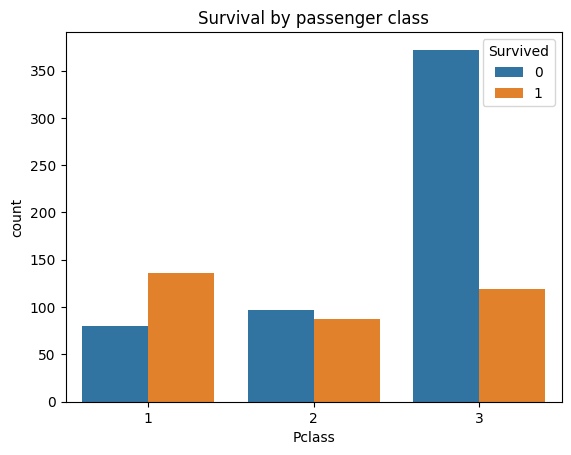

In [ ]:
#Graph Survival by passenger class
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival by passenger class")
plt.show()

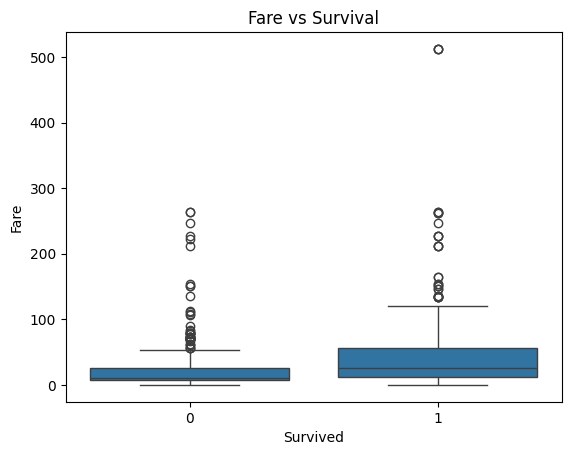

In [ ]:
#Fare vs Survival
sns.boxplot(x='Survived',y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [ ]:
X=df[["Pclass","Sex","Age","Parch","Fare","Embarked"]]
y=df[["Survived"]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
predicted=model.predict([[3,1,22,0,7.2500,2]])
print("survived(1) or not(0) :",predicted[0])


survived(1) or not(0) : 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X=df[["Pclass","Sex","Age","Parch","Fare","Embarked"]]
y=df[["Survived"]]

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2, random_state=42
)


In [ ]:
model=DecisionTreeClassifier(criterion="gini",max_depth=3)
model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred=model.predict(X_test)
print("Predicted:", y_pred)


Predicted: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7988826815642458


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf= rf.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
#Model Evaluation
def evaluate_model(y_test,y_pred):
  print("Accuracy:",accuracy_score(y_test,y_pred))
  print("Precision:",precision_score(y_test,y_pred))
  print("Recall:",recall_score(y_test,y_pred))
  print("F1_score:",f1_score(y_test,y_pred))
evaluate_model(y_test,y_pred)


Accuracy: 0.7988826815642458
Precision: 0.796875
Recall: 0.6891891891891891
F1_score: 0.7391304347826086


In [ ]:
#Confusion matrix graph
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rf)

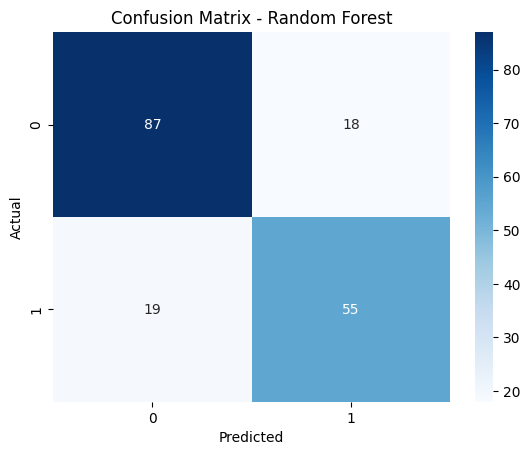

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()



In [ ]:
#classification report
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



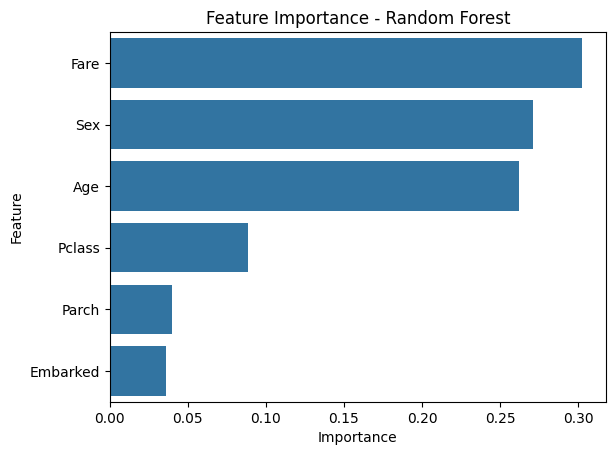

In [ ]:
#Feature importance
importances = rf.feature_importances_
feature = X.columns

feat_df = pd.DataFrame({
    'Feature': feature,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

sns.barplot(x='Importance',y='Feature',data=feat_df)
plt.title('Feature Importance - Random Forest')
plt.show()



#Property price prediction

Property Price Prediction (House Price Estimation)

1. Problem Statement

Property prices are influenced by multiple factors such as house size, location, age, and overall condition. Accurately estimating property prices is important for buyers, sellers, real estate companies, and financial institutions. Manual estimation often leads to incorrect pricing and poor decision-making.

The objective of this project is to build a regression-based machine learning model to predict property prices using historical housing data and to identify the most important factors influencing house prices.

2. Objectives of the Project

Understand property price patterns

Perform basic data preprocessing

Conduct minimal but meaningful Exploratory Data Analysis (EDA)

Build regression-based machine learning models

Evaluate model performance using regression metrics

Identify key price-influencing features


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
from google.colab import files
uploaded=files.upload()


Saving train.csv to train (1).csv


In [9]:
df = pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df.isnull()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [13]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [14]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [15]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


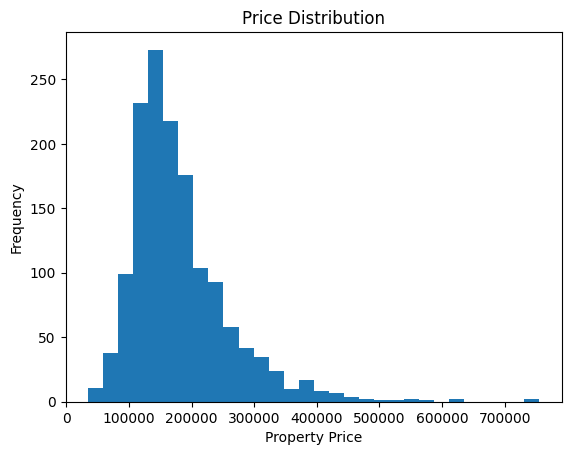

In [16]:

#Explory Data Analysis
#Graph 1 price prediction
plt.figure()
plt.hist(df['SalePrice'], bins=30)
plt.xlabel("Property Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

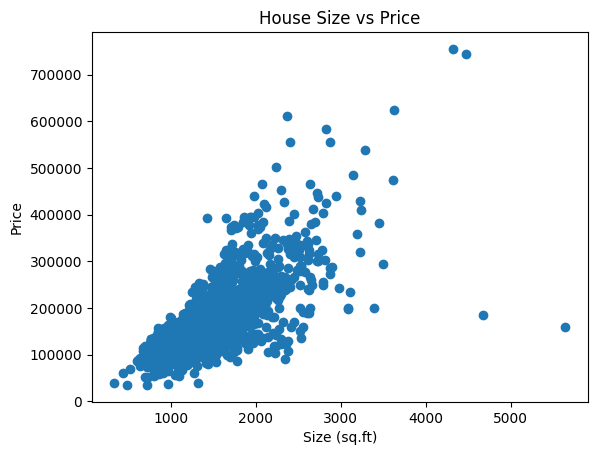

In [17]:
#Graph 2 House size vs price
plt.figure()
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel("Size (sq.ft)")
plt.ylabel("Price")
plt.title("House Size vs Price")
plt.show()


<Figure size 640x480 with 0 Axes>

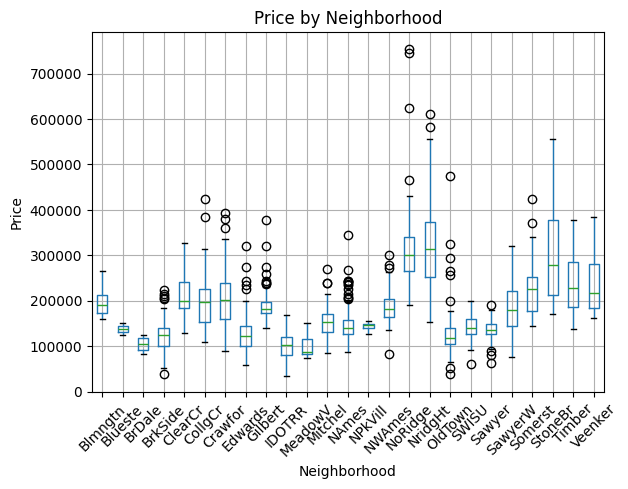

In [18]:
#Price by location
plt.figure()
df.boxplot(column='SalePrice', by='Neighborhood')
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.title("Price by Neighborhood")
plt.suptitle("")
plt.xticks(rotation=45)
plt.show()


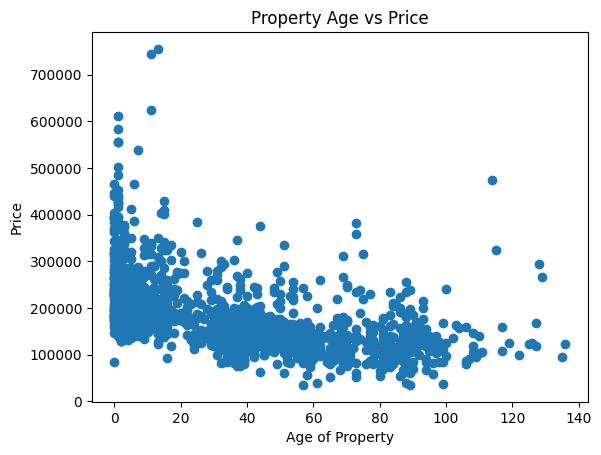

In [19]:
#Graph 4 Property Age vs price
df['Age'] = df['YrSold'] - df['YearBuilt']
plt.figure()
plt.scatter(df['Age'], df['SalePrice'])
plt.xlabel("Age of Property")
plt.ylabel("Price")
plt.title("Property Age vs Price")
plt.show()


In [20]:
#Encode Categorical Variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
#Feature selection
X = df.drop(['Id','SalePrice'], axis=1)
y = df['SalePrice']


In [22]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
#Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [25]:
y_pred_lr = lr.predict(X_test)

In [26]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [27]:
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2 Score:", r2_lr)


Linear Regression RMSE: 35312.138344719235
Linear Regression R2 Score: 0.8374323228511199


In [28]:
#decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [29]:
y_pred_dt = dt.predict(X_test)

In [30]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

In [31]:
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R2 Score:", r2_dt)


Decision Tree RMSE: 43833.769223265444
Decision Tree R2 Score: 0.7495022672545355


In [32]:
#Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
y_pred_rf = rf.predict(X_test)

In [34]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)


In [35]:
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest RMSE: 28316.757688529135
Random Forest R2 Score: 0.8954622340260382


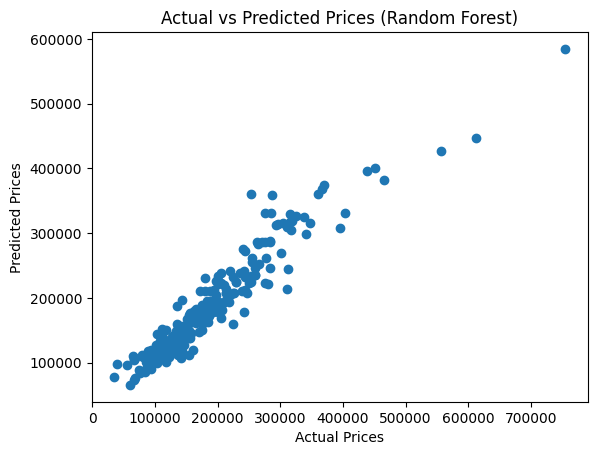

In [37]:
#Graph 5 Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()

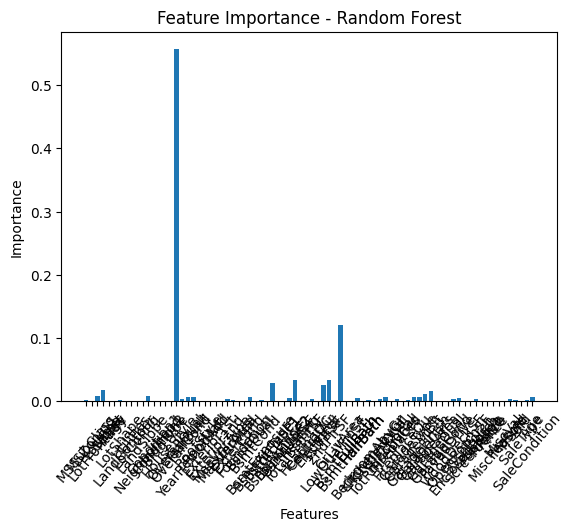

In [38]:
#Graph 6 Feature Importance
importance = rf.feature_importances_
features = X.columns

plt.figure()
plt.bar(features, importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=50)
plt.show()


In [41]:
#Final model Comparison
print("MODEL COMPARISON")
print("-----------------------------")
print("Linear Regression -> RMSE:", rmse_lr, " R2:", r2_lr)
print("Decision Tree     -> RMSE:", rmse_dt, " R2:", r2_dt)
print("Random Forest     -> RMSE:", rmse_rf, " R2:",r2_rf)

MODEL COMPARISON
-----------------------------
Linear Regression -> RMSE: 35312.138344719235  R2: 0.8374323228511199
Decision Tree     -> RMSE: 43833.769223265444  R2: 0.7495022672545355
Random Forest     -> RMSE: 28316.757688529135  R2: 0.8954622340260382
